###### PROJECT CODE ######

# Analysis of CSFD and IMDB movie ratings 

### Kateřina Havelková, Jolana Čermáková

We have decided to focus on a movie analysis as we both watch movies often and therefore we were interested in the fact how the most famous movie databases work from inside out. We were following the procedure of web scraping and implementing it on both the CSDF and IMDB databases. 
We considered reasonable number of top movies from both websites and looked for the differences between them. 

The biggest obstacle was to compare the number of votes quantitatively as on CSFD there is no particular number of votes given. There is just number of fans instead, which does not correspond to the total number of reviews. Because of that, we were forced to rely particularly on movie ratings - on IMDB, the movie rating is stated in two measures - basic 10-scale rating and also metascore obtained from professional movie critics. On CSFD, the movie rating is stated in one measure in percent. 


## 1. DATA SCRAPING

#### First obtaining top rated films from CSFD page

Web scraping information about 300 top rated movies by CSFD

The structure of the CSFD webpage offers a list of 300 top rated films on a single page. Hence, it allows us to scrape all needed information at once.

In [222]:
from requests import get
url = 'https://www.csfd.cz/zebricky/nejoblibenejsi-filmy/?show=complete'
response = get(url)
print(response.text[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="cs" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
	<meta name="description" content="ČSFD.cz">
	<meta name="theme-color" content="#bb0011">


	<title>Žebříčky | ČSFD.cz</title>

	<link rel="shortcut icon" href="htt


In [223]:
from bs4 import BeautifulSoup
#importing beautifulsoup from bs4 package

The fundamental approach to scrape a website is to use BeautifulSoup code, the most common one when doing web scraping in Python. It gives us an opportunity to scrape directly what we want from a particular website, therefore it is important to set a goal in the beginning and know what we want to analyze. It basically modifies the parse tree. The BeautifulSoup code gives us a beuatifulsoup object representing requested website as a nested data structure. As each request takes several seconds to proceed, we identified a more straightforward procedure. We figured out how both CSFD and IMDB websites work, how movies are evaluated and how each request look - then, we were able to extract only needed elements, actually with just a few requests. We used Developer Tools to discover both websites at their best.

In [224]:
#response.text object assigned to html_soup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

Based on the HTML structure, we extract the needed information from the page.

Aggregating data: name of the film and release year - extracting all td containers containing that information

In [225]:
movie_containers = html_soup.find_all('td', class_ = 'film')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
300


Aggregating data: csfd rating


In [226]:
movie_ratings = html_soup.find_all('td', class_ = 'average')
print(type(movie_ratings))
print(len(movie_ratings))

<class 'bs4.element.ResultSet'>
300


We aim to explore 300 movies which is proven by this result set - list of 300 movies that we are focusing on. There are now 300 containers, however in the beginning, we will use only the first one to extract all needed information and then use it for all other containers. To do this, we used Developer Tools again and explore our movie_ratings set and what we want to obtain from it.


Aggregating data: fans number

In [227]:
fans_number = html_soup.find_all('td', class_ = 'count')
print(type(fans_number))
print(len(fans_number))

<class 'bs4.element.ResultSet'>
300


Now, we utilize a list to store the scraped data in. We put all information that we want to know together.

In [228]:
names = []
years = []
csfd_ratings = []
fans = []

for container in movie_containers:
    
       # name of the film
        name = container.a.text
        names.append(name)
        # release year
        year = container.find('span', class_ = 'film-year').text
        years.append(year)


In [229]:
for container in movie_ratings:
        # The CSFD rating
        csfd = container.text
        csfd_ratings.append(csfd)


In [230]:
for container in fans_number:
        # The number of fans
        fan = container.text
        fans.append(fan)

Table for scraped data - this step will assure us if we did the above correctly (pandas):


In [231]:
import pandas as pd
movie_ratings = pd.DataFrame({'Movie': names,
                       'Year': years,
                       'CSFD rating': csfd_ratings,
                      'Fans number': fans
                       })
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Movie          300 non-null object
Year           300 non-null object
CSFD rating    300 non-null object
Fans number    300 non-null object
dtypes: object(4)
memory usage: 9.5+ KB
None


,Movie,Year,CSFD rating,Fans number
0,Forrest Gump,(1994),"94,5%",19329 fanoušků
1,Vykoupení z věznice Shawshank,(1994),"95,3%",17954 fanoušků
2,Pulp Fiction: Historky z podsvětí,(1994),"90,6%",16023 fanoušků
3,Temný rytíř,(2008),"90,2%",10890 fanoušků
4,Pán prstenů: Společenstvo Prstenu,(2001),"90,4%",10055 fanoušků
5,Počátek,(2010),"88,6%",9085 fanoušků
6,Zelená míle,(1999),"92,8%",8411 fanoušků
7,Matrix,(1999),"90,1%",8205 fanoušků
8,Pán prstenů: Návrat krále,(2003),"90,3%",8120 fanoušků
9,Pelíšky,(1999),"91,2%",7010 fanoušků


#### Now, we need to clean the scraped data

Firstly, the scraped CSFD rating is object type with % and Czech notation of decimal number. Thus, we need to transform it into the float type for better analysis.

In [232]:
#removing %
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.strip('%')

In [233]:
#as float
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.replace(',','.').astype(float)

Now, we transform year into float type.

In [234]:
#year as float
movie_ratings.loc[:, 'Year'] = movie_ratings['Year'].str[-5:-1].astype(int)

Moreover, we remove "fanoušků" from the fans number information and transform it into the float type.

In [235]:
#removing 'fanoušků'
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].str.strip('fanoušků')

In [236]:
#as integer
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].astype(int)

Here is a quick overview of our dataset, for instance, best rated film has CSFD rating of 96.1%, or the oldest film in the ranking is from 1953.

In [237]:
movie_ratings.describe().loc[['min', 'max'], ['CSFD rating', 'Fans number', 'Year']]

,CSFD rating,Fans number,Year
min,51.9,596.0,1953.0
max,96.1,19329.0,2019.0


#### Now, we need to obtain data from IMDB page

In order for us to have the most comparable list of fims from IMDB page with respect to CSFD page, we employ advanced search.
From the CSFD list we know, that the oldest film in the top rated films list is from 1953, hence we contrain the IMDB search to an interval 1.1.1953 - 1.1.2019.
Furthermore, the list is sorted by the number of votes and in a descending order.

The advanced search will transfer us to page which contains all the data we need for 50 movies. Given our aim, this means we will only have to do about 7 requests.

IMDB page offers not only IMDB rating but also Metascore rating. The IMDb score is generated by the IMDb users' ratings while the Metascore ratings are the scores from the website Metacritic.com. Scores are given by movie critics and the weighted score is assigned to a film. Hence, we employ both of these ratings for further comparison.

In [238]:
from requests import get
url3 = 'https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=01&ref_=adv_nxt'
response = get(url3)
print(response.text[:500])





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [239]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

Firstly, we will web scrape the first page

In [240]:
movie_containers3 = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers3))
print(len(movie_containers3))

<class 'bs4.element.ResultSet'>
50


Making list to store the scraped data:

In [241]:
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

for container in movie_containers3:
# If the movie has Metascore, then extract:
       if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name3 = container.h3.a.text
        names3.append(name3)
# The year
        year3 = container.h3.find('span', class_ = 'lister-item-year').text
        years3.append(year3)
# The IMDB rating
        imdb3 = float(container.strong.text)
        imdb_ratings3.append(imdb3)
# The Metascore
        m_score3 = container.find('span', class_ = 'metascore').text
        metascores3.append(int(m_score3))
# The number of votes
        vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
        votes3.append(int(vote3))

Visualization of the scraped data:

In [242]:
import pandas as pd
test_df3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(test_df3.info())
test_df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Movie              48 non-null object
Year               48 non-null object
IMDB rating        48 non-null float64
Metascore          48 non-null int64
Number of votes    48 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,Vykoupení z věznice Shawshank,(1994),9.3,80,2102081
1,Temný rytíř,(2008),9.0,84,2068272
2,Počátek,(2010),8.8,74,1842296
3,Klub rváčů,(1999),8.8,66,1680512
4,Pulp Fiction: Historky z podsvětí,(1994),8.9,94,1643607
5,Forrest Gump,(1994),8.8,82,1613472
6,Pán prstenů: Společenstvo prstenu,(2001),8.8,92,1512149
7,Matrix,(1999),8.7,73,1510543
8,Pán prstenů: Návrat krále,(2003),8.9,94,1496350
9,Kmotr,(1972),9.2,100,1442995


As not every film has Metascore, in order to have films with both of these ratings, we exclude those who do not have the Metascore.


Now, let us define interval for the loop which will download approximately 300 films together with films' information. From the url, we can see that there are several parameters after the question mark. Nevertheless, if we navigate through next pages and observe the url, only the values for "start" change. The values change based on the order of the first film on a particular page. As on each page, there can 50 films, the values alter by the value 50.

In [243]:
interval = [str(i) for i in [1,51,101,151,201,251,301]]


Apparently, IMDB translates some films' names into Czech. 
As not all films are translated, or they are not translated properly, we will keep this list of films in English language.

In [244]:
headers = {"Accept-Language": "en-US, en;q=0.5"} 

Next step takes approximately 3mins for computer to process.

In [245]:
from time import time

In [246]:
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

#The loop
start_time = time()
requests = 0

for start in interval:

        # Get request
        response = get('https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=' + start, headers = headers)
        
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Selected all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        for container in mv_containers:
           # # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name3 = container.h3.a.text
                names3.append(name3)

                # Scrape the year
                year3 = container.h3.find('span', class_ = 'lister-item-year').text
                years3.append(year3)

                # Scrape the IMDB rating
                imdb3 = float(container.strong.text)
                imdb_ratings3.append(imdb3)

                # Scrape the Metascore
                m_score3 = container.find('span', class_ = 'metascore').text
                metascores3.append(int(m_score3))

                # Scrape the number of votes
                vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
                votes3.append(int(vote3))

Now, we visualize the data we scraped:

In [247]:
movie_ratings3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(movie_ratings3.info())
movie_ratings3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
Movie              335 non-null object
Year               335 non-null object
IMDB rating        335 non-null float64
Metascore          335 non-null int64
Number of votes    335 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.2+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,(1994),9.3,80,2102081
1,The Dark Knight,(2008),9.0,84,2068272
2,Inception,(2010),8.8,74,1842296
3,Fight Club,(1999),8.8,66,1680512
4,Pulp Fiction,(1994),8.9,94,1643607
5,Forrest Gump,(1994),8.8,82,1613472
6,The Lord of the Rings: The Fellowship of the Ring,(2001),8.8,92,1512149
7,The Matrix,(1999),8.7,73,1510543
8,The Lord of the Rings: The Return of the King,(2003),8.9,94,1496350
9,The Godfather,(1972),9.2,100,1442995


Hence, we obtained by web scraping 334 best rated films from IMDB.

#### Again, we need to clean the data

Transforming year to integer:

In [248]:
movie_ratings3.loc[:, 'Year'] = movie_ratings3['Year'].str[-5:-1].astype(int)

In [249]:
movie_ratings3['Year'].head(3)

0    1994
1    2008
2    2010
Name: Year, dtype: int32

From the values in the table above, we can see that IMDB rating and Metascore have different scales. To be able to plot the two distributions on a single graph, we have to bring them to the same scale. Hence, we normalize IMDB rating to a 100-points scale.

In [250]:
movie_ratings3['Normalized IMDB rating'] = movie_ratings3['IMDB rating'] * 10

In [251]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Metascore,Number of votes,Normalized IMDB rating
0,The Shawshank Redemption,1994,9.3,80,2102081,93.0
1,The Dark Knight,2008,9.0,84,2068272,90.0
2,Inception,2010,8.8,74,1842296,88.0
3,Fight Club,1999,8.8,66,1680512,88.0
4,Pulp Fiction,1994,8.9,94,1643607,89.0


Reordering the columns:

In [252]:
movie_ratings3 = movie_ratings3[['Movie', 'Year', 'IMDB rating','Normalized IMDB rating', 'Metascore', 'Number of votes']]

In [253]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,1994,9.3,93.0,80,2102081
1,The Dark Knight,2008,9.0,90.0,84,2068272
2,Inception,2010,8.8,88.0,74,1842296
3,Fight Club,1999,8.8,88.0,66,1680512
4,Pulp Fiction,1994,8.9,89.0,94,1643607


## 2. Visualisation of data and analysis

#### Let us start with IMDB dataset

As we normalized IMDB rating, it is directly comparable with Metascore. Therefore, we first compare distributions of these two ratings. We plot the distributions of two ratings separately and on the third histogram we utilize the normalized IMDB rating for the desired comparison.

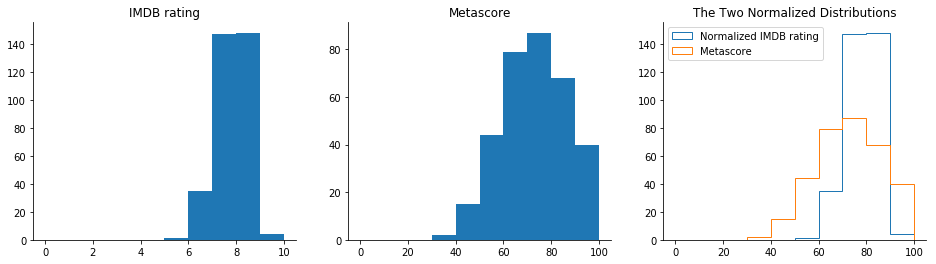

In [254]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10))
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) 
ax2.set_title('Metascore')
ax3.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4.

The distribution of Metascore ratings is more diverse, peaking at the value of approximately 75. From this peak, the frequencies gradually decrease toward extreme rating values. 

On the comparative graph, it’s clearer that the IMDB distribution is highly skewed toward the higher part of the average ratings, while the Metascore ratings seem to have a much more balanced distribution.

Secondly, we plot distributions of CSFD rating and IMDB rating. As these two datasets contain different films, they are not directly comparable. Nevertheless, we still utilize the comparative histogram in order to have at least some (approximate) idea about their distributions.

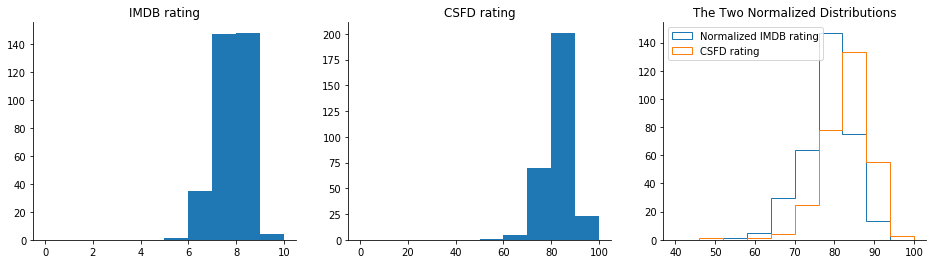

In [255]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax4, ax5, ax6 = fig.axes
ax4.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10)) 
ax4.set_title('IMDB rating')
ax5.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) 
ax5.set_title('CSFD rating')
ax6.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.legend(loc = 'upper left')
ax6.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

For the CSFD case, distribution seems to be even more unilateral compared to that from IMDB.
Interpretation of the last historgram must be done carefully, as there are different films in both data sets. 
Nevertheless, we can interpret the results in the sense that 300 top rated films according to CSFD webpage are rated more positively compared to the top rated 300 films from IMDB webpage. Hence, in general, the results suggest that the IMDB users tend to be more critical in the ratings of the films.

Lastly, we broadly compare distributions of CSFD rating and Metascore.

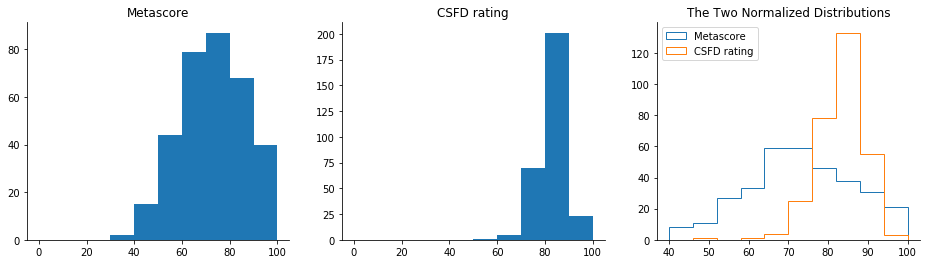

In [256]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax7, ax8, ax9 = fig.axes
ax7.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) 
ax7.set_title('Metascore')
ax8.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) 
ax8.set_title('CSFD rating')
ax9.hist(movie_ratings3['Metascore'], bins = 10, range = (40,100), histtype = 'step')
ax9.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax9.legend(loc = 'upper left')
ax9.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Again, interpretation of the last historgram must be done carefully, as there are different films in both data sets. Metascore ratings seem to have much more balanced distribution. And again, results seem to suggest that 300 top rated films according to CSFD webpage are assessed more positively than 300 top rated films according to IMDB.

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Here, we investigate the relationship between IMDB rating and inidividual release years.

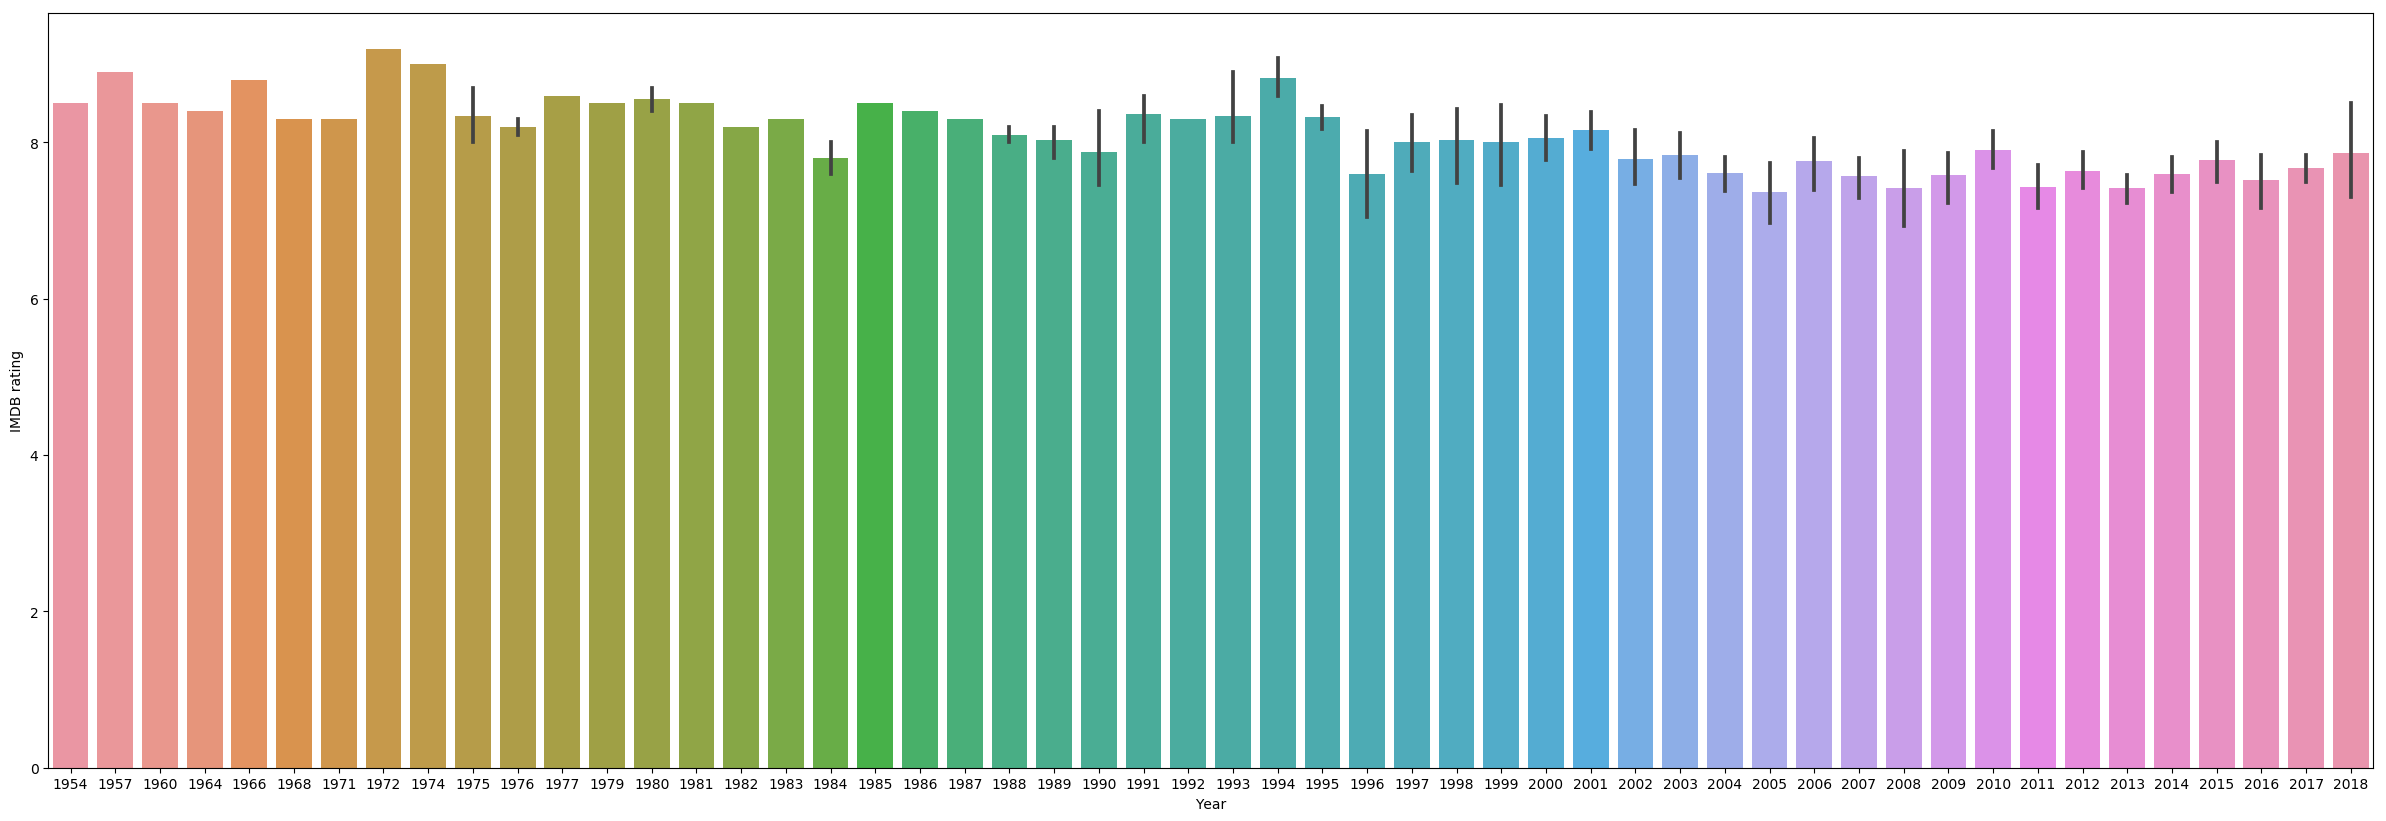

In [258]:
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Year', y='IMDB rating', data=movie_ratings3)

From the plot we can see that largest rating differences in dataset were in years 1996 and 2018.

Now, we analyze the relationship between films' rating and the number of votes.

Text(0.5, 1.0, 'Number of votes vs. IMDB rating')

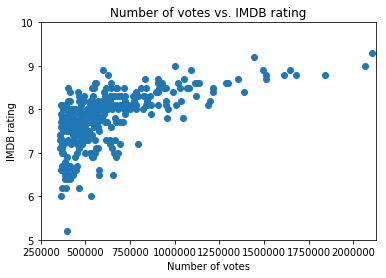

In [259]:
plt.scatter(movie_ratings3['Number of votes'], movie_ratings3['IMDB rating'])

#axis labels
plt.xlabel('Number of votes')
plt.ylabel('IMDB rating')

# set axis limits
plt.xlim([250000, 2125000])
plt.ylim([5, 10])
plt.title('Number of votes vs. IMDB rating')

A majority of votes is scattered in the interval between 250000 and 750000. There are two outliers in our IMDB dataset, which have more than 2mil votes.

Now, we analyze the data by decades.

In [260]:
import pandas as pd
from math import floor

Defining decade variable:

In [261]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [262]:
movie_ratings3["decade"] = movie_ratings3["Year"].apply(extract_decade)

C:\Users\uzivatel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [263]:
df = movie_ratings3
df = df.sort_values(by=['decade'], ascending=True)
df

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes,decade
275,Rear Window,1954,8.5,85.0,100,399984,1950s
124,12 Angry Men,1957,8.9,89.0,96,596782,1950s
154,2001: A Space Odyssey,1968,8.3,83.0,82,543523,1960s
161,Psycho,1960,8.5,85.0,97,539170,1960s
110,"The Good, the Bad and the Ugly",1966,8.8,88.0,90,624542,1960s
254,Dr. Strangelove or: How I Learned to Stop Worr...,1964,8.4,84.0,97,415794,1960s
9,The Godfather,1972,9.2,92.0,100,1442995,1970s
218,Monty Python and the Holy Grail,1975,8.3,83.0,93,462547,1970s
31,The Godfather: Part II,1974,9.0,90.0,90,1003048,1970s
83,A Clockwork Orange,1971,8.3,83.0,80,690273,1970s


In [264]:
df['vote_count']=df['Number of votes']
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()

In [265]:
import numpy as np
import plotly as py
import plotly.graph_objs as go

In [266]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [267]:
py.offline.init_notebook_mode(connected=True)

In [268]:
bar_data = [go.Bar(x=df_by_vote['decade']\
                   , y=df_by_vote["vote_count"],
                     marker=dict(
                        color='rgb(127,188,65)'
                    ))]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Vote Count for each Decade',
               'xaxis': {
                 'title': 'Decade'},
               'yaxis': {
                'title': 'Total Votes'}
        }})

In [269]:
df[df['decade'] == '1950s']

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes,decade,vote_count
275,Rear Window,1954,8.5,85.0,100,399984,1950s,399984
124,12 Angry Men,1957,8.9,89.0,96,596782,1950s,596782


Getting rid of 1950s decade, since there are only two films included.

In [270]:
df = df[df['decade'] != '1950s']

In [271]:
da = []
for i in range(0,len(pd.unique(df['decade']))):
    trace = {
            "type": 'violin',
            "x": df['decade'][df['decade'] == pd.unique(df['decade'])[i]],
            "y": df['IMDB rating'][df['decade'] == pd.unique(df['decade'])[i]],
            "name": pd.unique(df['decade'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    da.append(trace)

        
fig = {
    "data": da,
    "layout" : {
        "title": "Average Movie Ratings by Decade",
            "xaxis" : dict(title = 'Decade', autotick=False, showticklabels=True),
            "yaxis" : dict(title = 'Average Rating')
    }
}

iplot(fig, validate = False)

The following two plots highlight the difference in a number of votes for films released in different decades. Additionally, results suggest that IMDB users tend to be more critical to films released more recently, compared to the older films as the average is constantly decreasing in each decade. It might be due to the fact that people compare new movies to movies that they’ve seen in the past and deem them as original and better.

#### Now, let us utilize CSFD dataset

Here we investigate the relationship between CSFD rating and each year

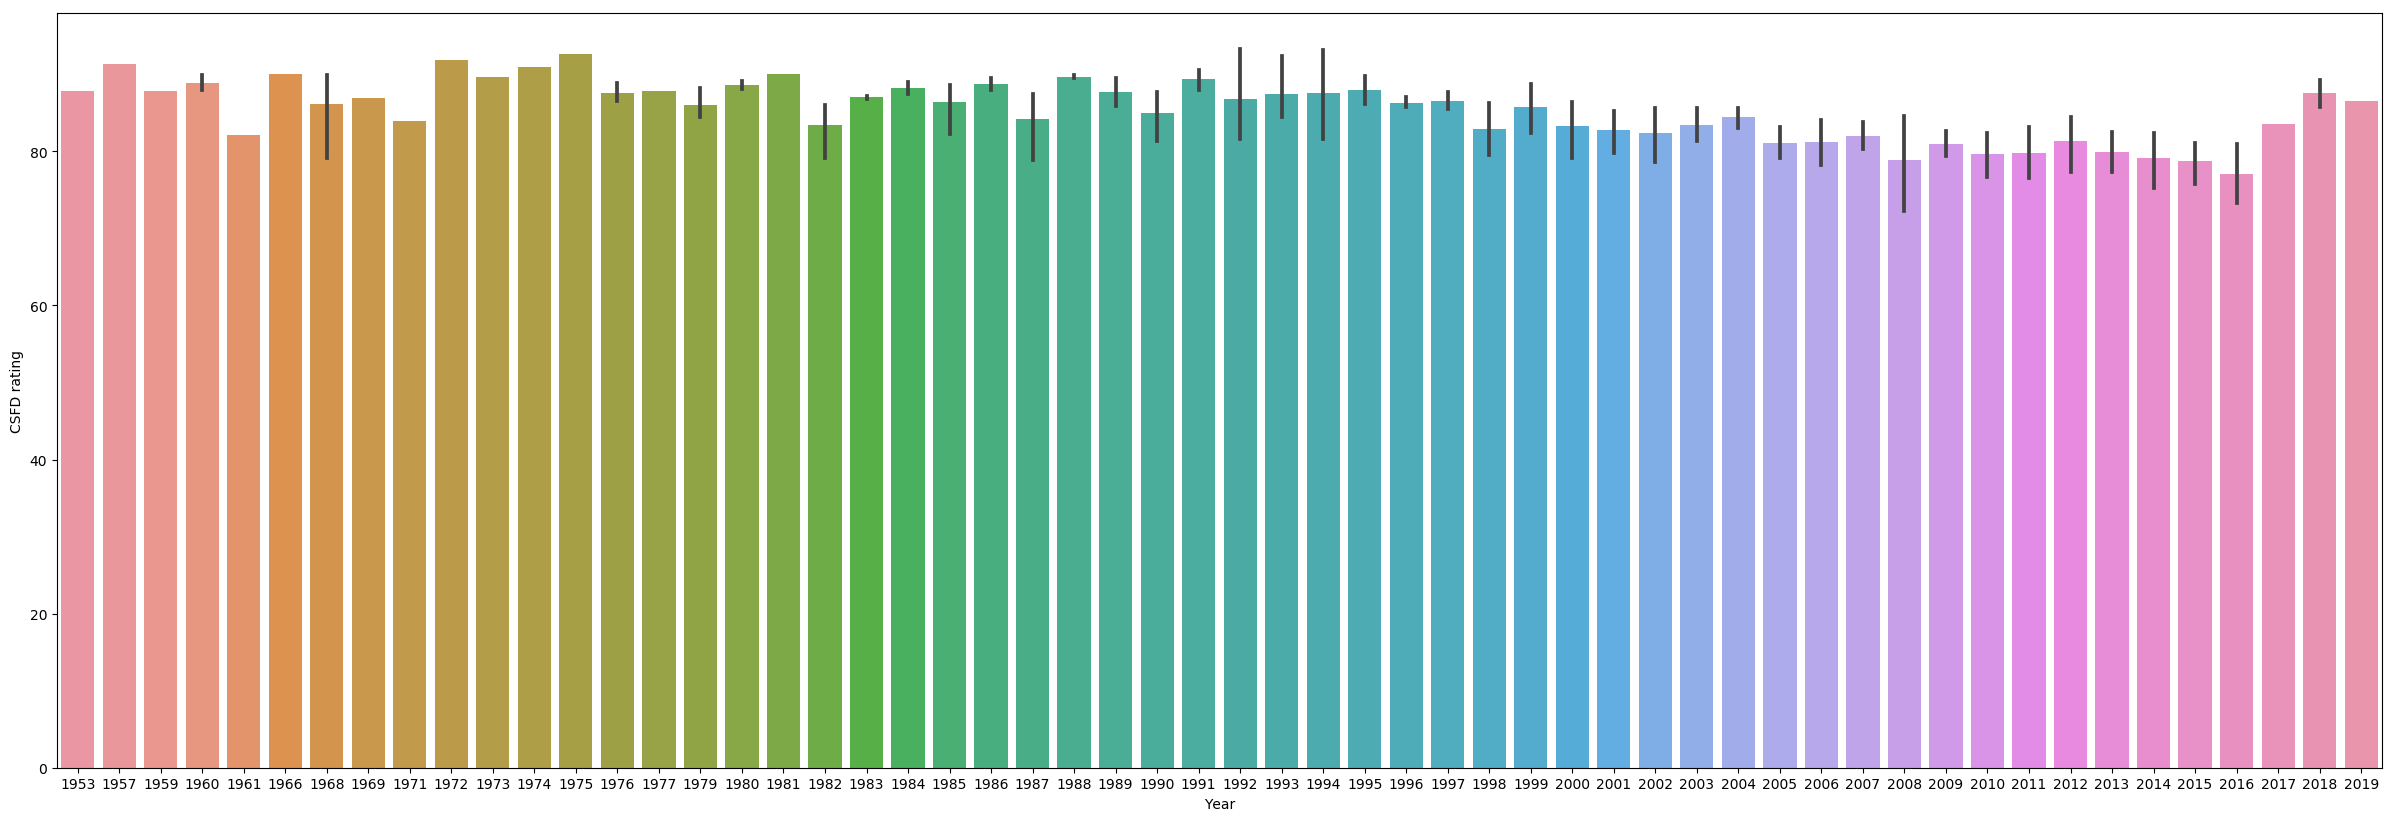

In [272]:
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Year', y='CSFD rating', data=movie_ratings)

Now, we analyze the relationship between CSFD rating and the number of fans

Text(0.5, 1.0, 'Fans number vs. CSFD rating')

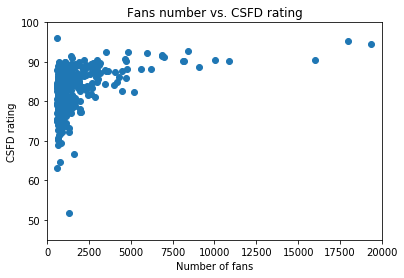

In [164]:
plt.scatter(movie_ratings['Fans number'], movie_ratings['CSFD rating'])

#axis labels
plt.xlabel('Number of fans')
plt.ylabel('CSFD rating')

# set axis limits
plt.xlim([0, 20000])
plt.ylim([45, 100])
plt.title('Fans number vs. CSFD rating')


For the CSFD case, a majority of films have a number of fans in interval from 0 ti 5000. There are multiple outliers, which have a number of fans higher than 15000.

#### CSFD and IMDB comparison

Now we analyze a subset of the same films from both servers. From CSFD webpage we obtain Czech names of the films, while from IMDB webpage we get English names of the films. Hence, we are not able to compare the lists to find the same names by code, we must do it mannualy. For our analysis we select 10 movies which are present in both lists.

In [121]:
x = movie_ratings3[movie_ratings3['Movie'].isin(['Inception', 'Fight Club', 'Pulp Fiction','Forrest Gump', 'The Shawshank Redemption', 'The Godfather','The Avengers','Saving Private Ryan', 'The Prestige','Avatar'])]

In [122]:
x

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,1994,9.3,93.0,80,2099576
2,Inception,2010,8.8,88.0,74,1840057
3,Fight Club,1999,8.8,88.0,66,1678634
4,Pulp Fiction,1994,8.9,89.0,94,1641702
5,Forrest Gump,1994,8.8,88.0,82,1611271
9,The Godfather,1972,9.2,92.0,100,1441374
17,The Avengers,2012,8.1,81.0,69,1183065
21,Saving Private Ryan,1998,8.6,86.0,91,1111336
24,The Prestige,2006,8.5,85.0,66,1065903
26,Avatar,2009,7.8,78.0,83,1044552


In [123]:
m = movie_ratings[movie_ratings['Movie'].isin(['Avatar', 'Počátek','Klub rváčů','Pulp Fiction: Historky z podsvětí','Forrest Gump', 'Vykoupení z věznice Shawshank', 'Kmotr','Avengers','Zachraňte vojína Ryana','Dokonalý trik'])]

In [124]:
m

,Movie,Year,CSFD rating,Fans number
0,Forrest Gump,1994,94.5,19327
1,Vykoupení z věznice Shawshank,1994,95.3,17952
2,Pulp Fiction: Historky z podsvětí,1994,90.6,16022
5,Počátek,2010,88.6,9083
10,Kmotr,1972,91.8,6880
12,Klub rváčů,1999,88.1,6200
15,Avatar,2009,82.3,5206
21,Avengers,2012,82.6,4488
28,Dokonalý trik,2006,87.8,3504
34,Zachraňte vojína Ryana,1998,89.1,3093


In [125]:
m.reindex([1,5,12,2,0,10,21,34,28,15])

,Movie,Year,CSFD rating,Fans number
1,Vykoupení z věznice Shawshank,1994,95.3,17952
5,Počátek,2010,88.6,9083
12,Klub rváčů,1999,88.1,6200
2,Pulp Fiction: Historky z podsvětí,1994,90.6,16022
0,Forrest Gump,1994,94.5,19327
10,Kmotr,1972,91.8,6880
21,Avengers,2012,82.6,4488
34,Zachraňte vojína Ryana,1998,89.1,3093
28,Dokonalý trik,2006,87.8,3504
15,Avatar,2009,82.3,5206


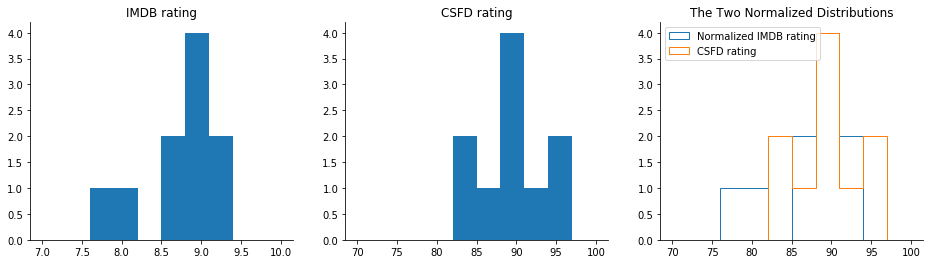

In [126]:
#plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax10, ax11, ax12 = fig.axes
ax10.hist(x['IMDB rating'], bins = 10, range = (7,10)) 
ax10.set_title('IMDB rating')
ax11.hist(m['CSFD rating'], bins = 10, range = (70,100)) 
ax11.set_title('CSFD rating')
ax12.hist(x['Normalized IMDB rating'], bins = 10, range = (70,100), histtype = 'step')
ax12.hist(m['CSFD rating'], bins = 10, range = (70,100), histtype = 'step')
ax12.legend(loc = 'upper left')
ax12.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

In these specific subsets, we have considered 10 movies of our own choice. All of them are very good movies, very well reviewed - that is the reason why we shrinked the plots to a range of 7 to 10 (there is no movie with a lower rating than 70%). We can see the differences in ratings pretty well on first two plots and the final comparison on the last plot. It seems, that people reviewing movies on IMDB are more sceptical, giving a lower rating to the identical movies. 

## 3. CONCLUSION

In overall, IMDB histogram distribution of 300 top rated films is more narrow compared to the Metascore rating which seems to have a much more balanced distribution. Our results suggest that IMDB users tend to be more skeptical when rating the films compared to the CSDF users. Furthermore, IMDB users are more critical to recently released films compared to the older classics.

Our main goal was to compare CSFD to IMDB ratings and to see how they differ. We found out that even when considering the similar set of movies, both distributions were quite different. One of our explanation of these disparities is that on IMDB there are all kind of reviewers from all over the world, particularly from the United States. On the other hand, on CSFD there are mainly Czech and Slovak reviewers. As the human mentality changes from border to border, it is obvious that these two distinct groups will have different opinions on investigated movies. For example, the majority of IMDB community can love some movie, while its rating on CSFD can be average, even below average.

Another observed factor is that as much as these websites and ratings can differ, the basic shape of their distribution will look very similar. That is given by the fact that we are dealing with the same problem, with normalized scale. Therefore the 10-point scale of primarily good world movies will have most of fans in the higher percentiles. Lower 50% will be nearly empty.

To conclude, we are happy that our results based on two considered movie websites were not the same for both of them. We were able to see the fundamental distinctions at the first sight and also to do some deeper analysis and graphic representations of all parameters that came into our mind. There would definitely be a way to make the project even more interesting, however we would need higher skills in Python to do that. Hopefully next time we will have a chance to dig deeper and to find out some remarkable resutls.

Our suggestion for further analysis is to evaluate each movie genre individually, both qualitatively and quantitatively, and then compare them. This could be done for a pre-specified group of movies. Another interesting analysis would be to consider comments of reviewers and apply a text mining practice on it. See which words are chosen at most, what is the average length of comments, explore positivity/negativity of comments and also how it influences future reviewers.